# Figure 1 - Everything except the mutation matrix and selection surface

In [1]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/'

Populating the interactive namespace from numpy and matplotlib


# Figure 1a: Length-dependent mutation rates

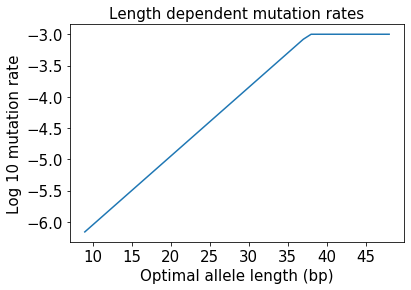

In [2]:
x = list(range(9, 49)) # X axis - optimal allele length
y = [] # Y axis - log 10 mutation rate

mu_opt_allele_5 = 10**-5.5 # Mutation rate for trinucleotides with optimal allele 5 # Old: 10^-7
L = 0.33 # L parameter value for trinucleotides # Old: 0.65

for elem in x:
    # Get mutation rate given optimal allele length
    mu = np.log10(mu_opt_allele_5)+L*(elem/3-5) 
   
    if mu < -8:
        mu = -8
        
    if mu > -3:
        mu = -3
    
    y.append(mu)
  
plt.figure(1)
plt.plot(x,y)
plt.xlabel('Optimal allele length (bp)', size=15)
plt.ylabel('Log 10 mutation rate', size=15)
plt.title('Length dependent mutation rates', size=15)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.savefig(PLOTDIR + 'length_dep_mut_rates.pdf', bbox_inches='tight')

# Figure 1a: Step sizes

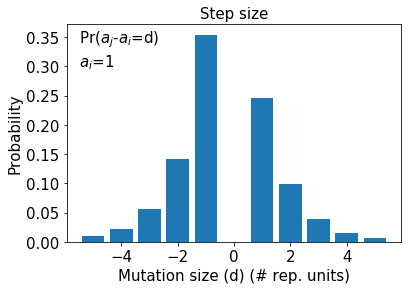

In [3]:
a1 = 1 # Starting allele from which to mutate
to_alleles = list(range(-5+a1, 6+a1)) # Alleles to mutate to
prob = [] # Y axis

p = 0.6
beta = 0.3
for elem in to_alleles:
    a2 = elem
    step_prob = GetStepSizeProb(a1, a2, beta, p)
    prob.append(step_prob)
    
step_sizes = [] # X axis
for elem in to_alleles:
    step_sizes.append(elem-a1)
    
fig = plt.figure(2)
ax = fig.add_subplot(111)
plt.bar(step_sizes, prob)
plt.xlabel('Mutation size (d) (# rep. units)', size=15)
plt.ylabel('Probability', size=15)
plt.title('Step size', size=15)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
string = 'Pr($a_j$-$a_i$=d) \n$a_i$=' + str(a1)
plt.text(-5.5,0.3, string,  size=15)
plt.savefig(PLOTDIR + 'step_size.pdf',bbox_inches='tight')

# Figure 1b: Allele fitness

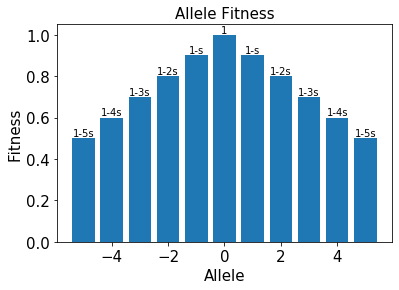

In [4]:
alleles = list(range(-5, 6))
fitness = []

s = 0.1
for elem in alleles:
    w = 1-abs(elem)*s
    fitness.append(w)

fig, ax = plt.subplots()
rects = ax.bar(alleles, fitness) 
ax.set_xlabel('Allele', size=15)
ax.set_ylabel('Fitness', size=15)
ax.set_title('Allele Fitness', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
rects = ax.patches

# Labels
labels = ['1-5s','1-4s', '1-3s', '1-2s', '1-s', '1', '1-s', '1-2s', '1-3s', '1-4s', '1-5s']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom', size = 10)

plt.savefig(PLOTDIR + 'allele_fitness.pdf', bbox_inches='tight')